# Unsupervised Learning:

**9.Implementing neural network using self-organizing maps**

SOMs organize data like a librarian arranging books on shelves: similar topics are grouped together, creating a map where nearby locations represent similar data points.

**************************

In [14]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('synthetic_books_dataset.csv')
df

,Category,NumBooks
0,Science,30
1,Art,90
2,Art,53
3,Art,8
4,History,62
...,...,...
85,Cooking,90
86,Cooking,14
87,History,62
88,Art,71


In [16]:
data = df[['NumBooks']].values.astype(float)

In [18]:
data = data / np.max(data)

In [19]:
map_size = (10, 10)  # Size of the SOM grid
input_len = data.shape[1]  # Number of features

In [20]:
som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.5, learning_rate=0.5)

In [21]:
som.train_random(data, 100)  # 100 iterations

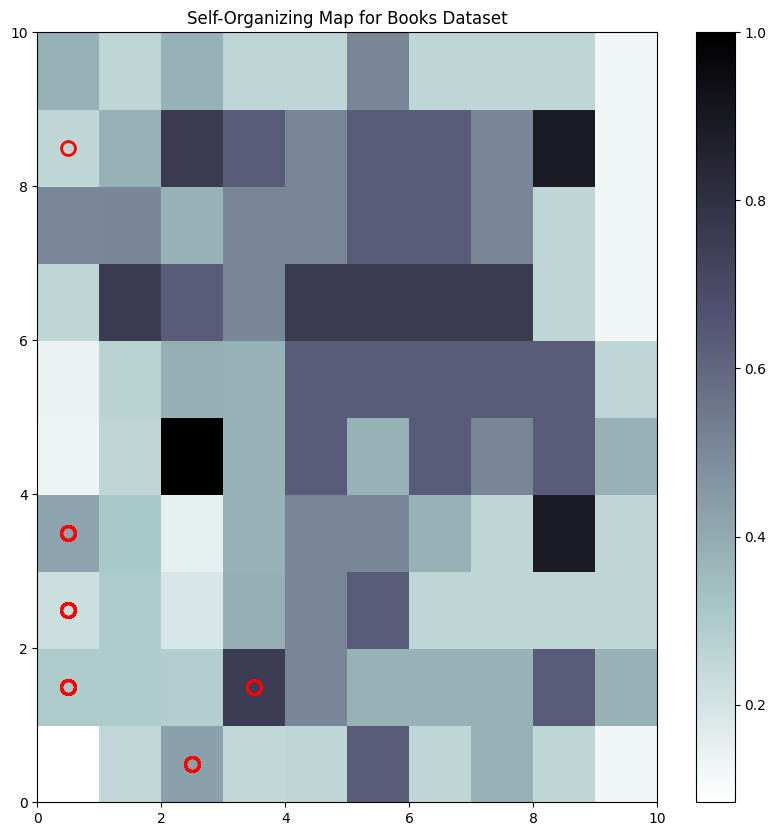

In [22]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot distance map
plt.colorbar()

# Add markers for each data point
for i, x in enumerate(data):
    w = som.winner(x)  # Find the winning neuron for data point x
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2)

plt.title('Self-Organizing Map for Books Dataset')
plt.show()